# Implementation of SVM 

#  Import libaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt #visualization
from sklearn import svm  #svm function
from sklearn.datasets import make_blobs #create data from library

# Create a custome training dataset

https://scikit-learn.org/stable/datasets/sample_generators.html#:~:text=Both%20make_blobs%20and%20make_classification%20create%20multiclass%20datasets%20by,class%3B%20and%20linear%20transformations%20of%20the%20feature%20space.

In [21]:
X,y=make_blobs(n_samples=100, n_features=2 ,centers=10,random_state=20) #40 lines with 2 centres each group 20 pieces data

In [23]:
print("Length of X:", len(X))
print("Length of Y:", len(y))

Length of X: 100
Length of Y: 100


In [20]:
print("Shape of X: ", np.shape(X))
print("Shape of y: ", np.shape(y))

Shape of X:  (150, 2)
Shape of y:  (150,)


In [12]:
y

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0])

# Load it to SVM

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [13]:
clf = svm.SVC(kernel='linear', C=2) # 2lines of codes seed=1 no regulizer , linear -2D only
clf.fit(X,y) 

SVC(C=2, kernel='linear')

In [14]:
X[:,0]

array([6.38876601, 1.89139437, 7.42104316, 8.47704476, 0.97059923,
       2.88274828, 1.160308  , 7.27542879, 2.08607703, 7.00192182,
       2.26571286, 6.86839861, 2.28968574, 7.9294032 , 8.35834306,
       9.13204399, 0.82767806, 1.59396992, 0.67778343, 7.97423722,
       2.25605326, 2.8137247 , 8.92604794, 1.42412542, 7.42608057,
       2.09222936, 6.77444559, 8.68770841, 7.29853534, 0.87712287,
       6.88059658, 2.12015254, 6.9758391 , 6.34822954, 1.65359865,
       0.48311336, 8.52161671, 7.59114483, 2.9671273 , 6.20111307,
       7.61095347, 2.40965011, 1.51927726, 1.71842122, 2.69548237,
       2.20064052, 6.8917041 , 9.92527993, 7.86880706, 2.70208537])

# Visualize the data

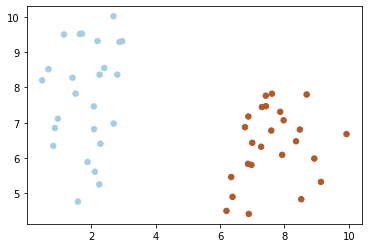

In [15]:
plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.Paired) #scatter plot just dots numpy array as X[:,0] - all rows only 1st value X Y plot, s=30 denotes the size of the dots, cmap for color
plt.show()

# Predict some unknown data

In [16]:
#prediction of new data
newData=[[30,48],[5,6]] 
print("Predicted Class for each of the data points: ",clf.predict(newData))

Predicted Class for each of the data points:  [1 1]


In [17]:
#prediction of new data
newData=[[8,9],[2,6]] 
print("Predicted Class for each of the data points: ",clf.predict(newData))

Predicted Class for each of the data points:  [1 0]


# Implementation of Decision Surface along with Support Vectors and margin

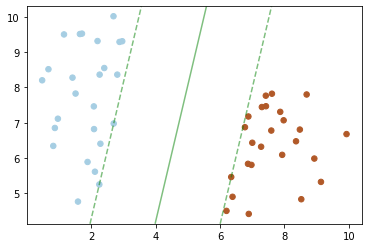

In [18]:
#fit the model
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X,y)
plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.Paired)

#plot the decision function
ax=plt.gca() 
xlim=ax.get_xlim() #get x-limit
ylim=ax.get_ylim() #get y-limit


#create grid to evaluate model
xx=np.linspace(xlim[0], xlim[1], 30) #create 30 points between 0 and 1
yy=np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy,xx)  #one array
xy=np.vstack([XX.ravel(), YY.ravel()]).T
Z= clf.decision_function(xy).reshape(XX.shape) #clf is support vector machine that is trained

#plot decison boundary and the support vectors
ax.contour(XX,YY, Z, colors='g', levels=[-1,0,1],
           alpha =0.5,
           linestyles=['--', '-','--'])
ax.scatter(clf.support_vectors_[:,0],
          clf.support_vectors_[:,1], s=100,
          linewidth=1, facecolors='none')
plt.show()


In [71]:
xx.shape

(30,)